# <b> <div style='font-size:125%; font-family:Arial'> Predicting Listing Price and Vehicle Trim <span style="float:right;"> V. Ganci </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> <hr style="border-top: 2px solid black; margin-top: 2px; margin-bottom: 0px;"> </div> </b>

Table of contents:
<ul>
    <li style='margin-bottom: 10px'><a href="#price"> 1. Predicting Dealer Listing Price </a></li>
        <ul style='margin-bottom: 10px'>
            <li style='margin-bottom: 5px'><a href="#price_data"> 1.1 Data Overview </a></li>
            <li style='margin-bottom: 5px'><a href="#price_eda"> 1.2 Exploratory Data Analysis </a></li>
            <li style='margin-bottom: 5px'><a href="#price_feng"> 1.3 Feature Engineering  </a></li>
            <li style='margin-bottom: 5px'><a href="#price_model"> 1.4 Model Creation </a></li>
            </ul>
    <li style='margin-top: 25px; margin-bottom: 10px'><a href="#trim"> 2. Predicting Vehicle Trim </a></li>
        <ul style='margin-bottom: 10px'>
            <li style='margin-bottom: 5px'><a href="#trim_eda"> 2.1 Exploratory Data Analysis </a></li>
            <li style='margin-bottom: 5px'><a href="#trim_feng"> 2.2 Feature Engineering  </a></li>
            <li style='margin-bottom: 5px'><a href="#trim_model"> 2.3 Model Creation </a></li>
            </ul>
    <li style='margin-top: 25px;'><a href="#appendix"> Appendix. Data Parameters Description </a></li>
</ul>



<a id='price'></a>
# <b> <div> <h1 style='font-family:Arial; font-size:110%; margin-top: 80px;'> Predicting Dealer Listing Price <span style="float:right;"> 1. </span> </h1> </div> <div> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> <hr style="border-top: 2px solid black; margin-top: 2px; margin-bottom: 0px;"> </div> </b>


In [1]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import pickle

<a id='price_data'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Data Overview  <span style="float:right;"> 1.1 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

In [2]:
# Display all columns in dataframes

pd.set_option('display.max_columns', None)


# Loading dataset

data0 = pd.read_csv('DataSet.csv')

data1 = data0.copy()

In [3]:
# Basic information about the data

print('The dataset consists of', data1.shape[0], 'rows and', data1.shape[1], 'columns.')

The dataset consists of 6298 rows and 29 columns.


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [5]:
# Descriptive statistics about the data

data1.describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6.298000e+03,6298.000000,6298.000000,6296.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.318130e+06,4.138346,434.565576,45234.211722,56.143670,26369.364358,2016.792633,32265.053314
std,2.486031e+06,1.188033,1274.257411,20380.478191,68.301329,13036.568712,1.206566,7538.339005
min,3.287000e+03,0.000000,0.000000,1105.000000,0.293102,0.000000,2015.000000,18289.000000
25%,2.178112e+06,4.000000,28.000000,28806.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.298122e+06,4.600000,126.000000,46410.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,6.488249e+06,4.800000,401.000000,60126.000000,74.139769,36468.500000,2018.000000,35991.000000
max,8.620012e+06,5.000000,14635.000000,99654.000000,820.684375,83037.000000,2019.000000,89500.000000


Remarks:

1. We note that some cars have a mileage of zero, which should not be the case if the cars are labeled as 'used'.
2. We note that some sellers have zero review count. What is their rating? Is it a nan value or zero?

In [6]:
data1.describe(include='bool')

,SellerIsPriv,VehCertified
count,6298,6298
unique,2,2
top,False,False
freq,6284,4879


Remarks:

1. We note a strong imbalance in the 'Seller is Private' column between True and False values.
2. The imbalance is less striking in the 'Vehicle is Certified' column, but still significant.

In [7]:
data1.describe(include='object')

,SellerCity,SellerListSrc,SellerName,SellerState,VehBodystyle,VehColorExt,VehColorInt,VehDriveTrain,VehEngine,VehFeats,VehFuel,VehHistory,VehMake,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,Vehicle_Trim
count,6298,6296,6298,6298,6298,6225,5570,5897,5937,6023,6296,6097,6298,6298,6013,6055,6298,6101,5893
unique,1318,8,2452,50,1,169,106,20,96,843,4,33,2,2,3,4920,1,33,29
top,Chicago,Digital Motorworks (DMi),Vroom (Online Dealer - Nationwide Delivery),IL,SUV,Bright White Clearcoat,Black,4WD,3.6L V6 24V MPFI DOHC,"['1st and 2nd row curtain head airbags', '4-wh...",Gasoline,"1 Owner, Buyback Protection Eligible",Jeep,Grand Cherokee,Good Deal,CARVANA CERTIFIED INCLUDES: 150-POINT INSPECTI...,Used,8-Speed Automatic,Limited
freq,118,3086,381,753,6298,586,3018,3836,1851,868,5902,2919,4199,4199,4488,218,6298,4395,1912


Remarks:

1. We note some categorical features having 1 unique entry, vehicle body style (unique entry = 'SUV') and vehicle type (unique entry = 'used'). In this case, these feature do not add any useful information.

In [8]:
# Check for duplicates

data1.duplicated().sum()

0

<a id='price_eda'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Exploratory Data Analysis <span style="float:right;"> 1.2 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

In [9]:
data1[data1['VehMileage'] == 0].shape[0]

11

We note that 11 entries have a 'Vehicle mileage' equal to zero. These cars should not be considered used cars, but new.

Therefore, we will remove these entries.

In [10]:
data1.drop(data1[data1['VehMileage'] == 0].index, inplace=True)

data1[data1['VehMileage'] == 0].shape[0]

0

In [11]:
data1[(data1['SellerRating'] == 0) & (data1['SellerRevCnt'] == 0)].shape[0]

170

We note that 170 entries have both 'Seller Rating' and 'Seller Review Count' equal to zero.

This should be considered a case of missing data. Since nobody has reviewed the sellers, setting a seller rating to zero is misleading and potentially untrue.

Therefore, if we want to use this feature as predictor, we need to remove these entries.

In [12]:
data1.drop(data1[(data1['SellerRating'] == 0) & (data1['SellerRevCnt'] == 0)].index, inplace=True)

data1[(data1['SellerRating'] == 0) & (data1['SellerRevCnt'] == 0)].shape[0]

0

In [13]:
data1.describe(include='bool')

,SellerIsPriv,VehCertified
count,6117,6117
unique,1,2
top,False,False
freq,6117,4728


We note that now the 'Seller Is Private' column has only 1 unique entry, being False. This feature therefore does not add any value will not be selected. 

In [14]:
print('Unique Vehicle Models:', data1['VehModel'].unique())
print('Unique Vehicle Makers:', data1['VehMake'].unique(), '\n')
print(data1[data1['VehMake'] == 'Cadillac'][['VehModel']].value_counts(), '\n')
print(data1[data1['VehMake'] == 'Jeep'][['VehModel']].value_counts(), '\n')
print('Total rows:',data1.shape[0])


Unique Vehicle Models: ['Grand Cherokee' 'XT5']
Unique Vehicle Makers: ['Jeep' 'Cadillac'] 

VehModel
XT5         2040
Name: count, dtype: int64 

VehModel      
Grand Cherokee    4077
Name: count, dtype: int64 

Total rows: 6117


We note that each Unique Vehicle Maker correspond to a Unique Vehicle Model.

Therefore, it is enough to consider only the 'Vehicle Makers' column and discard the 'Vehicle Model' one in our analysis.

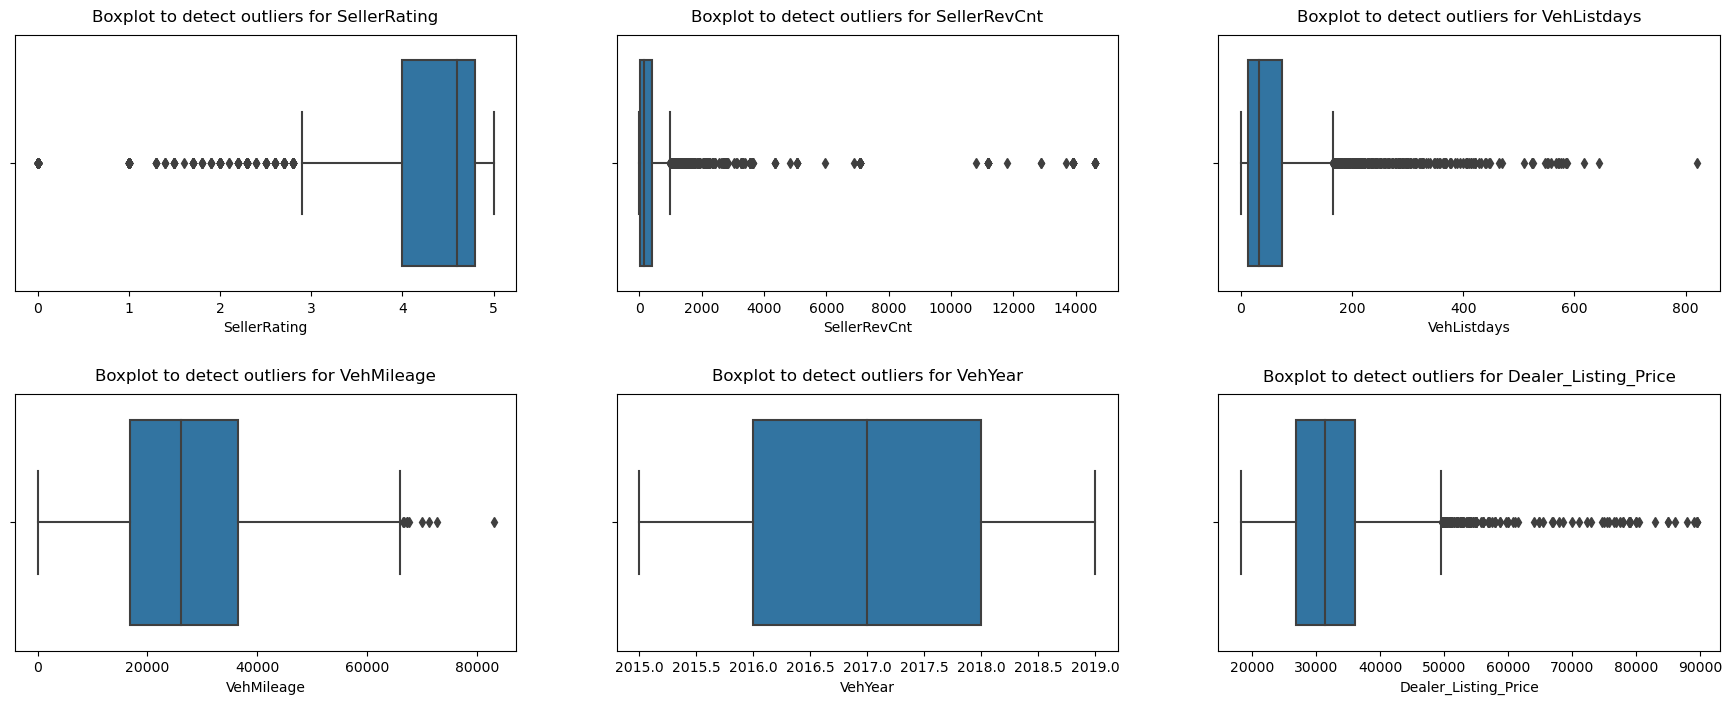

In [15]:
# Check for outliers in the numerical data

fig1, ax = plt.subplots(2, 3, figsize = (22,8))
plt.subplots_adjust(hspace=0.4)

ax[0,0].set_title('Boxplot to detect outliers for SellerRating', fontsize=12, y=1.02)
sns.boxplot(x=data1['SellerRating'], ax=ax[0,0])

ax[0,1].set_title('Boxplot to detect outliers for SellerRevCnt', fontsize=12, y=1.02)
sns.boxplot(x=data1['SellerRevCnt'], ax=ax[0,1])

ax[0,2].set_title('Boxplot to detect outliers for VehListdays', fontsize=12, y=1.02)
sns.boxplot(x=data1['VehListdays'], ax=ax[0,2])

ax[1,0].set_title('Boxplot to detect outliers for VehMileage', fontsize=12, y=1.02)
sns.boxplot(x=data1['VehMileage'], ax=ax[1,0])

ax[1,1].set_title('Boxplot to detect outliers for VehYear', fontsize=12, y=1.02)
sns.boxplot(x=data1['VehYear'], ax=ax[1,1])

ax[1,2].set_title('Boxplot to detect outliers for Dealer_Listing_Price', fontsize=12, y=1.02)
sns.boxplot(x=data1['Dealer_Listing_Price'], ax=ax[1,2])

plt.show()

Beside VehicleYear, all the other numerical features show outliers.
Before dealing with them, three questions must be answered:
1) Will the features be selected for creating the predicting model?
2) Is the chosen model strongly affected by the presence of outliers?
3) Are the outliers valid data or result of measurement/listing errors?

If the outliers must be taken care of, one strategy is to set an upper limit and lower limit for non-outlier values using the interquartile range:

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

where 
    
    iqr = percentile75 - percentile25, 
is the interquartile range.

In [16]:
# Features selection

selected_features = ['SellerListSrc', 'SellerRating', 'SellerRevCnt','VehCertified', 'VehDriveTrain', 'VehEngine',
                     'VehFuel','VehHistory', 'VehListdays', 'VehMake', 'VehMileage', 'VehPriceLabel', 'VehYear',
                     'Dealer_Listing_Price']

data1 = data1[selected_features]

In [17]:
# Check for null values

data1.isna().sum() 

SellerListSrc             2
SellerRating              0
SellerRevCnt              0
VehCertified              0
VehDriveTrain           368
VehEngine               333
VehFuel                   2
VehHistory              183
VehListdays               2
VehMake                   0
VehMileage                2
VehPriceLabel           253
VehYear                   0
Dealer_Listing_Price     50
dtype: int64

In [18]:
print('Percentage of missing values in:\n')
print('VehDriveTrain:',round(data1['VehDriveTrain'].isna().sum()/data1.shape[0]*100, 2))
print('VehEngine:',round(data1['VehEngine'].isna().sum()/data1.shape[0]*100, 2))
print('VehHistory:',round(data1['VehHistory'].isna().sum()/data1.shape[0]*100, 2))
print('VehPriceLabel:',round(data1['VehPriceLabel'].isna().sum()/data1.shape[0]*100, 2))
print('Dealer_Listing_Price:',round(data1['Dealer_Listing_Price'].isna().sum()/data1.shape[0]*100, 2))


Percentage of missing values in:

VehDriveTrain: 6.02
VehEngine: 5.44
VehHistory: 2.99
VehPriceLabel: 4.14
Dealer_Listing_Price: 0.82


In [19]:
data1 = data1.dropna()

round(data1.shape[0]/data0.shape[0]*100, 2)

86.57

After removing the missing values, the updated dataset consists of 86.57% of the original one, losing 13.43% of the latter.

<a id='price_feng'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Feature Engineering <span style="float:right;"> 1.2 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

Let's get the number of cylinder from the 'VehEngine' column.

In [20]:
data1['VehEngine'].value_counts()

VehEngine
3.6L V6 24V MPFI DOHC                  1707
3.6L V6 24V GDI DOHC                   1000
Regular Unleaded V-6 3.6 L/220          565
Gas V6 3.6L/222.6                       366
3.6L V6 24V MPFI DOHC Flexible Fuel     306
                                       ... 
Gas V6 3.6L/222.6 CU.IN.                  1
V6, Flex Fuel, 3.6 Liter                  1
V-8 cyl                                   1
3.6L 6 CYL. GAS                           1
6.2L 8 Cyl.                               1
Name: count, Length: 89, dtype: int64

In [21]:
data1['Cyl'] = data1['VehEngine']

mask = (data1['Cyl'].str.contains('V6', case=False)) | (data1['Cyl'].str.contains('V.{1}6', case=False)) | (data1['Cyl'].str.contains('6.{1}Cyl', case=False)) 

data1.loc[mask, 'Cyl'] = 6

mask = (data1['Cyl'].str.contains('V8', case=False)) | (data1['Cyl'].str.contains('V.{1}8', case=False)) | (data1['Cyl'].str.contains('8.{1}Cyl', case=False)) 

data1.loc[mask, 'Cyl'] = 8

data1['Cyl'].value_counts()

Cyl
6        5044
8         305
3.6L       45
3.6 L      44
3.6         6
5.7 L       4
HEMI        2
6           1
3.0 L       1
Name: count, dtype: int64

We note that some entries do not have the Cylinder info in the 'VehEngine' column.

Let's drop these entries.

In [22]:
strings = ['3.6L', '3.6 L', '3.6', '5.7 L', 'HEMI', '3.0 L', '6']

for string in strings:
    data1.drop(data1[(data1['Cyl'] == string)].index, inplace=True)
    
data1['Cyl'] = data1['Cyl'].astype(int)
    
data1['Cyl'].value_counts()

Cyl
6    5044
8     305
Name: count, dtype: int64

Let's get the number of Liters from the 'VehEngine' column.

In [23]:
data1['Liters'] = data1['VehEngine']

In [24]:
mask = (data1['Liters'].str.contains('3.0', case=False))
data1.loc[mask, 'Liters'] = 3.0

mask = (data1['Liters'].astype(str).str.contains('3.6', case=False))
data1.loc[mask, 'Liters'] = 3.6

mask = (data1['Liters'].astype(str).str.contains('5.7', case=False))
data1.loc[mask, 'Liters'] = 5.7

mask = (data1['Liters'].astype(str).str.contains('6.2', case=False))
data1.loc[mask, 'Liters'] = 6.2

mask = (data1['Liters'].astype(str).str.contains('6.4', case=False))
data1.loc[mask, 'Liters'] = 6.4

In [25]:
data1['Liters'].value_counts()

Liters
3.6                   4794
5.7                    206
6 Cylinder             127
3.0                     99
6.4                     69
6.2                     17
V6 Cylinder Engine      15
V-6 cyl                 14
8 Cylinder               3
Gas V6                   2
8 Cylinder Engine        2
V-8 cyl                  1
Name: count, dtype: int64

Let's drop the entries that do not have the Liters info in the 'VehEngine' column.

In [26]:
strings = ['6 Cylinder', 'V6 Cylinder Engine', 'V-6 cyl', '8 Cylinder', 'Gas V6', '8 Cylinder Engine', 'V-8 cyl', '6']

for string in strings:
    data1.drop(data1[(data1['Liters'] == string)].index, inplace=True)
    
data1['Liters'] = data1['Liters'].astype(float)

data1['Liters'].value_counts()

Liters
3.6    4794
5.7     206
3.0      99
6.4      69
6.2      17
Name: count, dtype: int64

Let's get the number of accidents from the 'VehHistory' column

In [27]:
data1['Accidents'] = data1['VehHistory']

mask = (data1['Accidents'].str.contains('Accident', case=False))

data1.loc[mask, 'Accidents'] = 1

data1.loc[~mask, 'Accidents'] = 0

data1['Accidents'] = data1['Accidents'].astype(int)

data1['Accidents'].value_counts()

Accidents
0    4645
1     540
Name: count, dtype: int64

Let's get the number of owners from the 'VehHistory' column

In [28]:
data1['Owners'] = data1['VehHistory']

mask = (data1['Owners'].astype(str).str.contains('0.{1}Owner', case=False))
data1.loc[mask, 'Owners'] = 0

mask = (data1['Owners'].astype(str).str.contains('1.{1}Owner', case=False))
data1.loc[mask, 'Owners'] = 1

mask = (data1['Owners'].astype(str).str.contains('2.{1}Owner', case=False))
data1.loc[mask, 'Owners'] = 2

mask = (data1['Owners'].astype(str).str.contains('3.{1}Owner', case=False))
data1.loc[mask, 'Owners'] = 3

mask = (data1['Owners'].astype(str).str.contains('4.{1}Owner', case=False))
data1.loc[mask, 'Owners'] = 4

data1['Owners'] = data1['Owners'].astype(int)

data1['Owners'].value_counts()

Owners
1    4595
2     312
0     258
3      16
4       4
Name: count, dtype: int64

Let's get the type of vehicle drive train from the 'VehDriveTrain' column

In [29]:
data1['VehDriveTrain'].value_counts()

VehDriveTrain
4WD                                                           3423
FWD                                                            955
AWD                                                            627
4X4                                                             38
FRONT-WHEEL DRIVE                                               33
Four Wheel Drive                                                32
ALL-WHEEL DRIVE                                                 25
All Wheel Drive                                                 16
Front Wheel Drive                                               15
4x4/4WD                                                          9
AWD or 4x4                                                       6
4x4                                                              1
AllWheelDrive                                                    1
ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL       1
ALL WHEEL                                       

We note that the same Vehicle DriveTrain can be listed in different ways. Let's fix this by creating 5 classes.

In [30]:
mask = (data1['VehDriveTrain'] == '4X4') | (data1['VehDriveTrain'] == 'Four Wheel Drive') | (data1['VehDriveTrain'] == '4x4') | (data1['VehDriveTrain'] == '4x4/4WD')

data1.loc[mask, 'VehDriveTrain'] = '4WD'

mask = (data1['VehDriveTrain'] == 'All Wheel Drive') | (data1['VehDriveTrain'] == 'All-wheel Drive') | (data1['VehDriveTrain'] == 'ALL WHEEL') | (data1['VehDriveTrain'] == 'AllWheelDrive') | (data1['VehDriveTrain'] == 'ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL') | (data1['VehDriveTrain'] == 'ALL-WHEEL DRIVE')

data1.loc[mask, 'VehDriveTrain'] = 'AWD'

mask = (data1['VehDriveTrain'] == 'Front Wheel Drive') | (data1['VehDriveTrain'] == 'FRONT-WHEEL DRIVE')

data1.loc[mask, 'VehDriveTrain'] = 'FWD'

mask = (data1['VehDriveTrain'] == 'AWD or 4x4')

data1.loc[mask, 'VehDriveTrain'] = '4WD/AWD'

data1['VehDriveTrain'].value_counts()

VehDriveTrain
4WD        3503
FWD        1003
AWD         671
4WD/AWD       7
2WD           1
Name: count, dtype: int64

Lets transform the categorical columns to numerical ones.

In [31]:
data1['VehCertified'] = data1['VehCertified'].astype(int)

data1['VehMake'] = data1['VehMake'].map({'Jeep': 0, 'Cadillac': 1})

data1['VehPriceLabel'] = data1['VehPriceLabel'].map({'Fair Price': 0, 'Good Deal': 1, 'Great Deal': 2})

veh_fuel_dummies = pd.get_dummies(data1['VehFuel'], dtype=int, prefix='Fuel')
data1 = pd.concat([data1, veh_fuel_dummies], axis=1)

seller_list_src_dummies = pd.get_dummies(data1['SellerListSrc'], dtype=int, prefix='SellerList')
data1 = pd.concat([data1, seller_list_src_dummies], axis=1)

veh_drive_train_dummies = pd.get_dummies(data1['VehDriveTrain'], dtype=int, prefix='Drive_Train')
data1 = pd.concat([data1, veh_drive_train_dummies], axis=1)

In [32]:
round(data1.shape[0]/data0.shape[0] *100, 2)

82.33

After feature engineering, we have lost only 4.24% of the original data set.

<a id='price_model'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Model Creation <span style="float:right;"> 1.3 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

In [33]:
# Features selection

y = data1['Dealer_Listing_Price']

selected_features = ['SellerRating', 'SellerRevCnt', 'VehCertified', 'VehListdays',
                     'VehMake', 'VehMileage', 'VehPriceLabel', 'VehYear',
                     'Cyl', 'Liters', 'Accidents', 'Owners', 'Fuel_Diesel',
                     'Fuel_E85 Flex Fuel', 'Fuel_Gasoline',
                     'SellerList_Cadillac Certified Program',
                     'SellerList_Digital Motorworks (DMi)', 'SellerList_HomeNet Automotive',
                     'SellerList_Inventory Command Center',
                     'SellerList_Jeep Certified Program', 'SellerList_My Dealer Center',
                     'Drive_Train_4WD', 'Drive_Train_AWD', 'Drive_Train_FWD']

X = data1[selected_features]

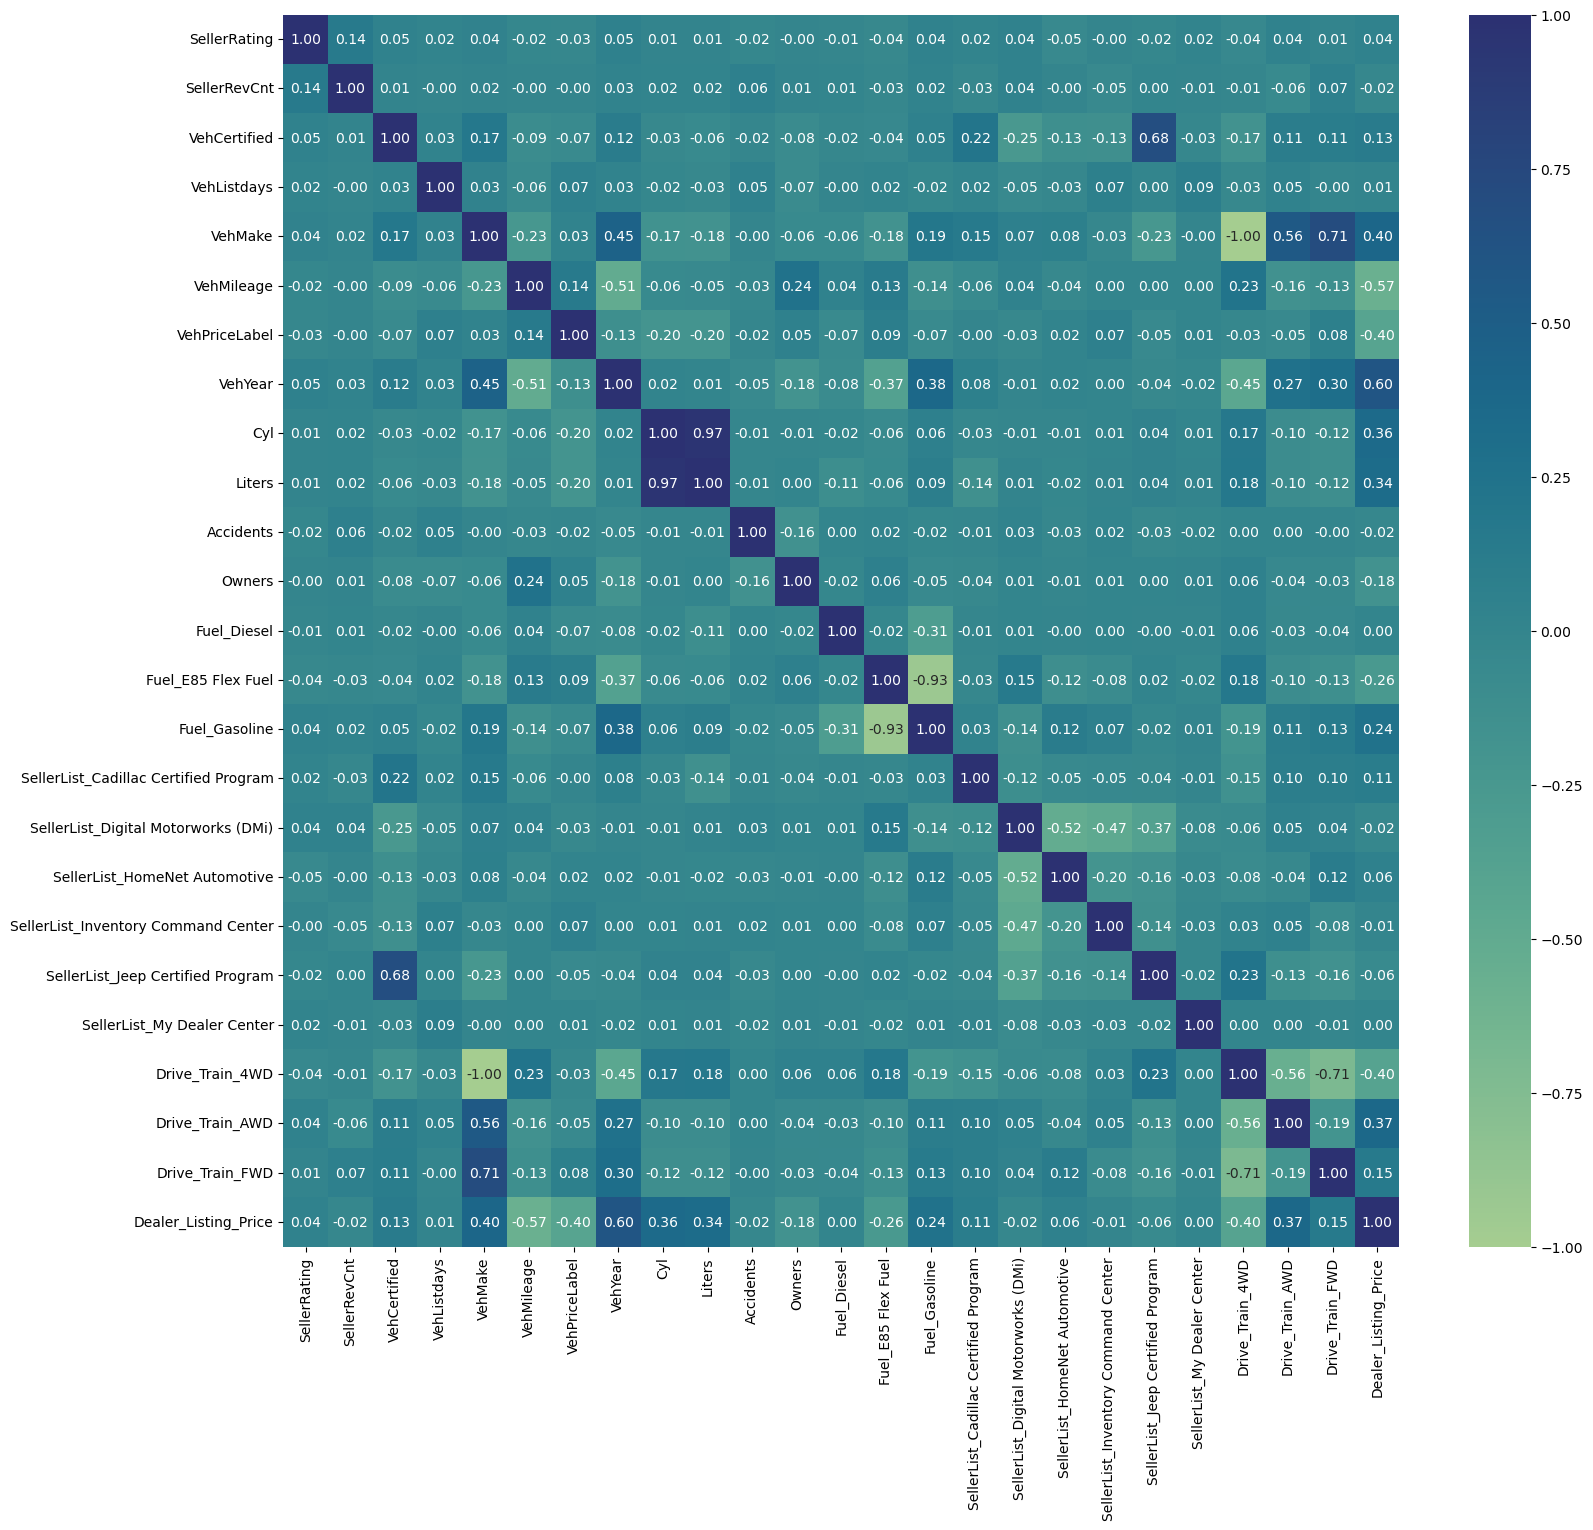

In [34]:
# Varible correlation heatmap

plt.figure(figsize=(18, 16))

heatmap = sns.heatmap(pd.concat([X,y], axis=1).corr(), vmin=-1, vmax=1, annot=True, cmap='crest', fmt=".2f")

plt.show()

We note that the Dealer listing price is moderately correlated with the different drive trains, with the different types of fuel, with the number of owners, with the vehicle year, the price label, the engine liters and cylinders, the mileage, and the maker.

We note also different degrees of correlation between the predictors.

It is best therefore to use a model which is not strongly affected by outliers and correlated predictors, like a random forest regression model.

In [35]:
# Split the data to train - test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
# Create and fit the model

forest_model_1 = RandomForestRegressor(random_state=0)

forest_model_1.fit(X_train, y_train)

# Predict the target variable and calculate the R2 score of the model

y_pred = forest_model_1.predict(X_test)

r2 = round(r2_score(y_test, y_pred), 4)

print('Number of selected features:',len(selected_features))
print("R2 Score on Test Set: ", r2)

Number of selected features: 24
R2 Score on Test Set:  0.8343


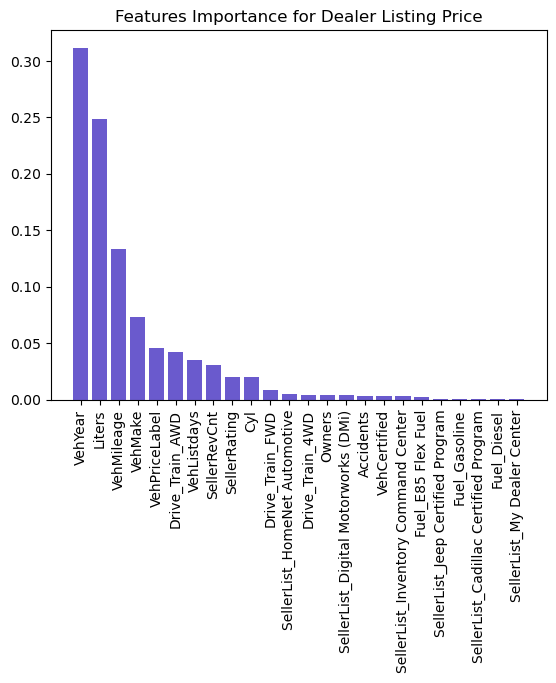

In [37]:
# Features importance

importances = forest_model_1.feature_importances_
indices = np.argsort(importances)[::-1]

fig2 = plt.figure()

plt.title('Features Importance for Dealer Listing Price')
plt.bar(range(X_train.shape[1]), importances[indices], color="slateblue", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.show()

We note that a lot of features have low importance. Let's reduce the number of features and check how the R2 score of the model gets impacted.

In [38]:
# New feature selection, train - test split, model creation, model fit, target prediction, and model's R2 score calculation

y = data1['Dealer_Listing_Price']

selected_features = ['SellerRating', 'SellerRevCnt', 'VehCertified', 'VehListdays',
                     'VehMake', 'VehMileage', 'VehPriceLabel', 'VehYear',
                     'Cyl', 'Liters', 'Accidents', 'Owners']

X = data1[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

forest_model_2 = RandomForestRegressor(random_state=0)

forest_model_2.fit(X_train,y_train)

y_pred = forest_model_2.predict(X_test)

r2 = round(r2_score(y_test, y_pred), 4)

print('Number of selected features:',len(selected_features))
print("R2 Score on Test Set: ", r2)

Number of selected features: 12
R2 Score on Test Set:  0.8235


We removed 13 features and the model's R2 score decreased only by ~0.01, which is a good trade-off, increasing the model explainability.

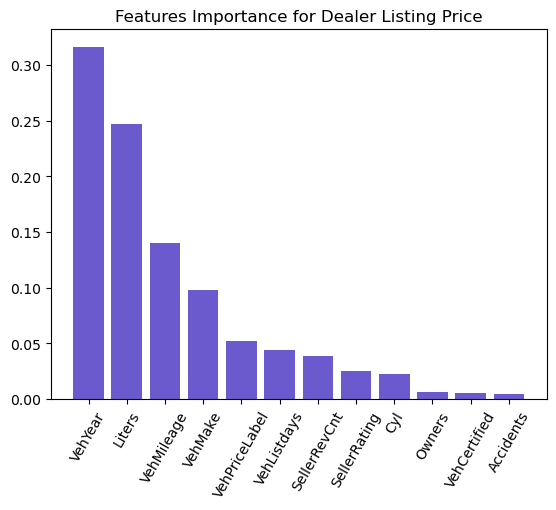

In [39]:
# Features importance

importances = forest_model_2.feature_importances_
indices = np.argsort(importances)[::-1]

fig3 = plt.figure()

plt.title('Features Importance for Dealer Listing Price')
plt.bar(range(X_train.shape[1]), importances[indices], color="slateblue", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), [selected_features[i] for i in indices], rotation=60)
plt.show()
fig3.savefig('Features_Importance_Listing_Price.jpg', dpi=250, bbox_inches='tight')

In [40]:
# Let's apply cross-validation to assess the model performance

cv_scores = cross_val_score(forest_model_2, X, y, cv=5, scoring='r2')

print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())

Cross-Validation Scores:  [0.80897542 0.79545409 0.83800731 0.84953254 0.82959768]
Mean Cross-Validation Score:  0.8243134058505224


The cross-validation led to good results with a R2 mean cross-validation score of ~0.82

In [41]:
# Save the model

with open('used_cars_price_forest_model.pkl', 'wb') as file:
    pickle.dump(forest_model_2, file)

<a id='trim'></a>
# <b> <div> <h1 style='font-family:Arial; font-size:110%; margin-top: 100px;'> Predicting Vehicle Trim <span style="float:right;"> 2. </span> </h1> </div> <div> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> <hr style="border-top: 2px solid black; margin-top: 2px; margin-bottom: 0px;"> </div> </b>


In [42]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score

import pickle

<a id='trim_eda'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Exploratory Data Analysis  <span style="float:right;"> 2.1 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

In [43]:
data0 = pd.read_csv('DataSet.csv')
data1 = data0.copy()

In [44]:
selected_features = ['VehDriveTrain', 'VehEngine','VehFeats', 'VehFuel', 'VehMake', 'VehPriceLabel','Vehicle_Trim']

data1 = data1[selected_features]

In [45]:
data1.isna().sum() 

VehDriveTrain    401
VehEngine        361
VehFeats         275
VehFuel            2
VehMake            0
VehPriceLabel    285
Vehicle_Trim     405
dtype: int64

In [46]:
print('Percentage of missing values in:')
print('VehDriveTrain:',round(data1['VehDriveTrain'].isna().sum()/data1.shape[0]*100, 2))
print('VehEngine:',round(data1['VehEngine'].isna().sum()/data1.shape[0]*100, 2))
print('VehFeats:',round(data1['VehFeats'].isna().sum()/data1.shape[0]*100, 2))
print('VehPriceLabel:',round(data1['VehPriceLabel'].isna().sum()/data1.shape[0]*100, 2))
print('Vehicle_Trim:',round(data1['Vehicle_Trim'].isna().sum()/data1.shape[0]*100, 2))

Percentage of missing values in:
VehDriveTrain: 6.37
VehEngine: 5.73
VehFeats: 4.37
VehPriceLabel: 4.53
Vehicle_Trim: 6.43


In [47]:
data1 = data1.dropna()

round(data1.shape[0]/data0.shape[0]*100,2)

87.71

<a id='trim_feng'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Feature Engineering <span style="float:right;"> 2.3 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

In [48]:
data1['Vehicle_Trim'].value_counts()

Vehicle_Trim
Limited                             1816
Premium Luxury                       715
Laredo                               653
Luxury                               595
Overland                             367
Altitude                             281
Summit                               222
Trailhawk                            162
Base                                 151
Platinum                             126
High Altitude                         78
SRT                                   68
Luxury FWD                            49
FWD                                   47
Laredo E                              44
Premium Luxury FWD                    35
Trackhawk                             27
Sterling Edition                      26
Luxury AWD                            20
Platinum AWD                          13
Premium Luxury AWD                     9
75th Anniversary                       8
Limited 75th Anniversary Edition       5
Upland                                 3
SRT

In [49]:
mask = (data1['Vehicle_Trim'].astype(str).str.contains('75th Anniversary', case=False))
data1.loc[mask, 'Vehicle_Trim'] = '75th Anniversary'

mask = (data1['Vehicle_Trim'].astype(str).str.contains('Limited 4x4', case=False))
data1.loc[mask, 'Vehicle_Trim'] = 'Limited'

mask = (data1['Vehicle_Trim'].astype(str).str.contains('SRT Night', case=False))
data1.loc[mask, 'Vehicle_Trim'] = 'SRT'

In [50]:
data1['VehEngine'].value_counts()

VehEngine
3.6L V6 24V MPFI DOHC                  1736
3.6L V6 24V GDI DOHC                   1018
Regular Unleaded V-6 3.6 L/220          585
Gas V6 3.6L/222.6                       368
3.6L V6 24V MPFI DOHC Flexible Fuel     316
                                       ... 
3.6L V6 310HP                             1
6.4L V8                                   1
6.4L 8 Cylinder Engine                    1
V-8 cyl                                   1
6.2L 8 Cyl.                               1
Name: count, Length: 89, dtype: int64

In [51]:
data1['Cyl'] = data1['VehEngine']

mask = (data1['Cyl'].str.contains('V6', case=False)) | (data1['Cyl'].str.contains('V.{1}6', case=False)) | (data1['Cyl'].str.contains('6.{1}Cyl', case=False)) 

data1.loc[mask, 'Cyl'] = 6

mask = (data1['Cyl'].str.contains('V8', case=False)) | (data1['Cyl'].str.contains('V.{1}8', case=False)) | (data1['Cyl'].str.contains('8.{1}Cyl', case=False)) 

data1.loc[mask, 'Cyl'] = 8

data1['Cyl'].value_counts()

Cyl
6        5106
8         313
3.6 L      46
3.6L       45
3.6         6
5.7 L       4
HEMI        2
6           1
3.0 L       1
Name: count, dtype: int64

In [52]:
strings = ['3.6L', '3.6 L', '3.6', '5.7 L', 'HEMI', '3.0 L', '6']

for string in strings:
    data1.drop(data1[(data1['Cyl'] == string)].index, inplace=True)
    
data1['Cyl'] = data1['Cyl'].astype(int)
    
data1['Cyl'].value_counts()

Cyl
6    5106
8     313
Name: count, dtype: int64

In [53]:
data1['Liters'] = data1['VehEngine']

In [54]:
mask = (data1['Liters'].str.contains('3.0', case=False))
data1.loc[mask, 'Liters'] = 3.0

mask = (data1['Liters'].astype(str).str.contains('3.6', case=False))
data1.loc[mask, 'Liters'] = 3.6

mask = (data1['Liters'].astype(str).str.contains('5.7', case=False))
data1.loc[mask, 'Liters'] = 5.7

mask = (data1['Liters'].astype(str).str.contains('6.2', case=False))
data1.loc[mask, 'Liters'] = 6.2

mask = (data1['Liters'].astype(str).str.contains('6.4', case=False))
data1.loc[mask, 'Liters'] = 6.4

data1['Liters'].value_counts()

Liters
3.6                   4907
5.7                    212
6 Cylinder             132
6.4                     69
3.0                     41
6.2                     18
V-6 cyl                 17
V6 Cylinder Engine      14
8 Cylinder               4
Gas V6                   2
8 Cylinder Engine        2
V-8 cyl                  1
Name: count, dtype: int64

In [55]:
strings = ['6 Cylinder', 'V6 Cylinder Engine', 'V-6 cyl', '8 Cylinder', 'Gas V6', '8 Cylinder Engine', 'V-8 cyl', '6']

for string in strings:
    data1.drop(data1[(data1['Liters'] == string)].index, inplace=True)
    
data1['Liters'] = data1['Liters'].astype(float)

data1['Liters'].value_counts()

Liters
3.6    4907
5.7     212
6.4      69
3.0      41
6.2      18
Name: count, dtype: int64

In [56]:
data1['VehDriveTrain'].value_counts()

VehDriveTrain
4WD                                                           3504
FWD                                                            967
AWD                                                            645
4X4                                                             43
Four Wheel Drive                                                36
All Wheel Drive                                                 16
Front Wheel Drive                                               15
4x4/4WD                                                          9
AWD or 4x4                                                       6
ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL       1
2WD                                                              1
ALL WHEEL                                                        1
4x4                                                              1
AllWheelDrive                                                    1
4WD/AWD                                         

In [57]:
mask = (data1['VehDriveTrain'] == '4X4') | (data1['VehDriveTrain'] == 'Four Wheel Drive') | (data1['VehDriveTrain'] == '4x4') | (data1['VehDriveTrain'] == '4x4/4WD')

data1.loc[mask, 'VehDriveTrain'] = '4WD'

mask = (data1['VehDriveTrain'] == 'All Wheel Drive') | (data1['VehDriveTrain'] == 'All-wheel Drive') | (data1['VehDriveTrain'] == 'ALL WHEEL') | (data1['VehDriveTrain'] == 'AllWheelDrive') | (data1['VehDriveTrain'] == 'ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL') | (data1['VehDriveTrain'] == 'ALL-WHEEL DRIVE')

data1.loc[mask, 'VehDriveTrain'] = 'AWD'

mask = (data1['VehDriveTrain'] == 'Front Wheel Drive') | (data1['VehDriveTrain'] == 'FRONT-WHEEL DRIVE')

data1.loc[mask, 'VehDriveTrain'] = 'FWD'

mask = (data1['VehDriveTrain'] == 'AWD or 4x4')

data1.loc[mask, 'VehDriveTrain'] = '4WD/AWD'

data1['VehDriveTrain'].value_counts()

VehDriveTrain
4WD        3593
FWD         982
AWD         664
4WD/AWD       7
2WD           1
Name: count, dtype: int64

In [58]:
data1['VehMake'] = data1['VehMake'].map({'Jeep': 0, 'Cadillac': 1})

data1['VehPriceLabel'] = data1['VehPriceLabel'].map({'Fair Price': 0, 'Good Deal': 1, 'Great Deal': 2})

data1['VehPriceLabel'].fillna(1, inplace=True)

In [59]:
veh_fuel_dummies = pd.get_dummies(data1['VehFuel'], dtype=int, prefix='Fuel')
data1 = pd.concat([data1, veh_fuel_dummies], axis=1)

veh_drive_train_dummies = pd.get_dummies(data1['VehDriveTrain'], dtype=int, prefix='Drive_Train')
data1 = pd.concat([data1, veh_drive_train_dummies], axis=1)

Let's get some car features from the 'VehFeats' column that would help in classifying the vehicle trim.

In [60]:
vehicle_feats = []

for entry in range(data1.shape[0]):
    feats = eval(data1.iloc[entry]['VehFeats'])
    for i in feats:
        vehicle_feats.append(i)
        
unique_feats = {}

for item in vehicle_feats:
    if item in unique_feats:
        unique_feats[item] += 1
    else:
        unique_feats[item] = 1
        
unique_feats = dict(sorted(unique_feats.items(), key=lambda item: item[1], reverse=True))

In [61]:
unique_feats_100 = {k: v for k, v in unique_feats.items() if v >= 100}

unique_feats_100_keys = list(unique_feats_100.keys())

len(unique_feats_100_keys)

52

In the cell above, I tried the following values:

    -- v >= 50, which results in 70 unique_feats and Precision, Recall, Accuracy around 0.86.
    -- v >= 100, which results in 52 unique_feats and Precision, Recall, Accuracy around 0.85.
    -- v >= 250, which results in 34 unique_feats and Precision, Recall, Accuracy around 0.79.
    
Therefore, I selected v >= 100.

In [62]:
for feat in unique_feats_100_keys:
    data1[feat] = data1['VehFeats']

    mask = (data1[feat].str.contains(feat, case=False))
    
    data1.loc[mask, feat] = 1
    data1.loc[~mask, feat] = 0
    
    data1[feat] = data1[feat].astype(int)

C:\Users\Valileo\AppData\Local\Temp\ipykernel_12592\1086047512.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = (data1[feat].str.contains(feat, case=False))


In [63]:
data1.drop('Fuel_Unknown', axis=1, inplace=True)
data1.drop('VehFuel', axis=1, inplace=True)
data1.drop('VehEngine', axis=1, inplace=True)
data1.drop('VehFeats', axis=1, inplace=True)
data1.drop('VehDriveTrain', axis=1, inplace=True)
data1.drop('Drive_Train_2WD', axis=1, inplace=True)
data1.drop('Drive_Train_4WD', axis=1, inplace=True)

Since random forest model work with numbers, let's encode the 'Vehicle_Trim' column.

In [64]:
le = LabelEncoder()
data1['Vehicle_Trim'] = le.fit_transform(data1['Vehicle_Trim'])

<a id='trim_model'></a>
# <b> <div style='color:b; background-color:w; text-align:left; font-size:100%; font-family:Arial; margin-top: 75px;'> Model Creation <span style="float:right;"> 2.3 </span> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> </div> </b>

In [65]:
y = data1['Vehicle_Trim']

predictors = [col for col in data1.columns if col != 'Vehicle_Trim']
X = data1[predictors].reindex(sorted(data1[predictors].columns), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [66]:
xgb_model_class_1 = xgb.XGBClassifier(random_state=0)

xgb_model_class_1.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
y_pred = xgb_model_class_1.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('Number of selected features:', len(X.columns))
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Number of selected features: 62
Precision: 0.8387028229358263
Recall: 0.8504761904761905
Accuracy: 0.8504761904761905


C:\Users\Valileo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


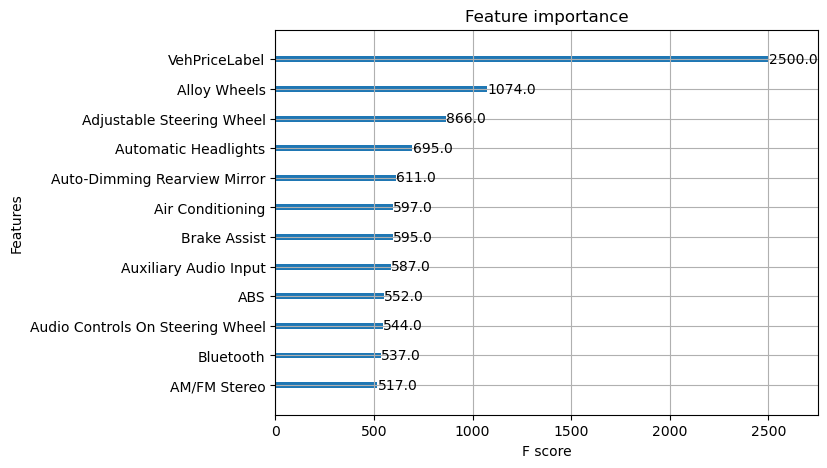

In [68]:
fig4, ax = plt.subplots(figsize = (7,5))

plt.title('Features Importance for Vehicle Trim')

xgb.plot_importance(xgb_model_class_1, max_num_features=12, ax=ax)

fig4.savefig('Features_Importance_Vehicle_Trim.jpg', dpi=250, bbox_inches='tight')
plt.show()

In [69]:
# Let's apply cross-validation to assess the model performance

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
cv_scores = cross_val_score(xgb_model_class_1, X, y, cv=cv, scoring='f1_weighted')

print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())

Cross-Validation Scores:  [0.83950206 0.82246732 0.82739522]
Mean Cross-Validation Score:  0.8297882027882183


In [70]:
# Save the model

with open('used_cars_trim_xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model_class_1, file)

<a id='appendix'></a>
# <b> <div> <h1 style='font-family:Arial; font-size:110%; margin-top: 80px;'> Appendix. Data Parameters Description </h1> </div> <div> <hr style="border-top: 2px solid black; margin-top: 5px; margin-bottom: 0px;"> <hr style="border-top: 2px solid black; margin-top: 2px; margin-bottom: 0px;"> </div> </b>


<img src="Parameters_Description.png" alt="Alt text" style="float: left; margin-right: 10px;" />